# Visualiser des principes de base de l'IRM
## Quelques outils pour observer la composition des images du cerveau

Ce notebook présente des exemples d'images IRM utilisant différents types de séquences. Ces images ont pour but de visualiser les différents paramètres de l'IRM et leurs effets sur la représention des tissues.

### Nilearn
Nous utiliserons cette [librairie](https://nilearn.github.io/user_guide.html) pour effectuer l'ensemble du travail. Accédez la documentation pour davantage d'info et d'exemples.

* Nilearn 6.2

Nilearn est gros, nous pouvons donc n'importer que les parties qui nous intéressent. Nilearn contient le module [`plotting`](https://nilearn.github.io/modules/reference.html#module-nilearn.plotting) nous permettant de tirer profit, en (presqu') une seule ligne de code, d'une vaste gamme de techniques de visualisation. Allez voir la liste, mais commençons par la base.

## Importer les données
On commence par récupérer des données. [Ici](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets), vous avez la liste des jeux de données qui se retrouvent à même la librairie Nilearn. 

Nous choisissons le *template* (modèle) du Montreal Neurological Institute (MNI). Il s'agit, en quelque sorte, d'un cerveau moyen. Ces données représentent l'espace à partir duquel on repère les différentes régions cérébrales.

In [1]:
from nilearn.datasets import fetch_icbm152_2009
mni = fetch_icbm152_2009() # mni est un dictionnaire contenant plusieurs objets

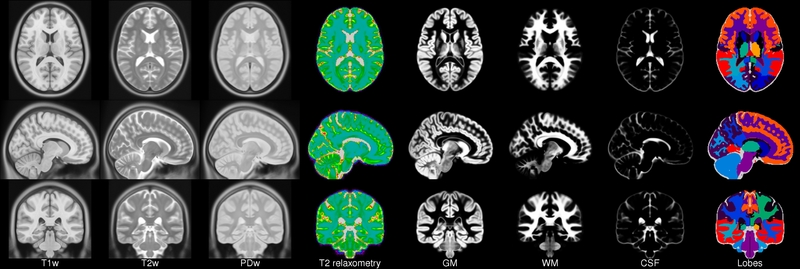

## Images pondérées en T1
On dit plus couramment qu'on utilise une séquence structurelle lorsqu'on regarde ces images. C'est ce qu'on veut dire lorsqu'on parle tout simplement d'une image par Résonance Magnétique.

`plot_anat` visualise un scan anatomique. Ici, l'image retourne de façon statique. Nous avons une coordonnée représentée sur les trois coupes. Nous restons donc en deux dimensions.

C'est une image typique de l'anatomie. Nous pouvons bien distinguer les tissue. La matière grise est grise, la blanche est blanche, les ventricules sont noirs (tout comme une partie de la boîte crânienne). Comme on l'a vu, c'est à l'aide de cette pondération que nous pouvons mener des analyses structurelles.

In [2]:
from nilearn.plotting import plot_anat
plot_anat(mni.t1, cut_coords=[-17, 0, 17],title='MRI en contraste T1')

(Pour ceux et celles qui sont curieux.ses, vous avez là un type d'objet qu'on appelle bytes, utilisé pour représenter le spectre noir à blanc sur les trois axes. Les Bytes prennent moins d'espace de stockage)

In [3]:
mni.t1?

`view_img`, quant à lui, nous permet d'interagir avec l'image à l'aide de notre curseur. On peut donc modifier la coordonnée d'origine.

In [4]:
from nilearn.plotting import view_img 
viewer = view_img(mni.t1, bg_img=None, title='MRI en contraste T1', cmap='gray', symmetric_cmap=False, 
                  black_bg=True, threshold=None,)

In [5]:
viewer.save_as_html('t1.html')

Nous avons accès à des données HTML qui nous permettent d'explorer les trois coupes. 

**[Ouvrez-les](t1.html)** (assurez-vous d'ouvrir ce lien dans un ***nouvel onglet***)

## Images pondérées en T2
Nous utilisons encore la fonction `plot_anat` pour représenter le spectre de noir à blanc (0 à 1) qui nous aide à distinguer les tissues. Le T2 est moins intuitif pour les dissocier; on ne l'utilise pas pour explorer les segmenter. 

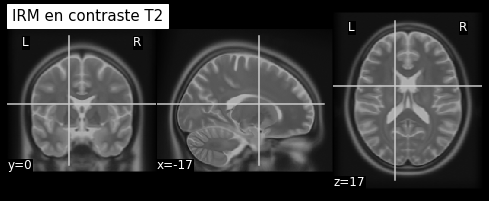

In [6]:
plot_anat(mni.t2, cut_coords=[-17, 0, 17], title='IRM en contraste T2')

On peut aussi explorer l'image de façon interactive.

In [7]:
viewer = view_img(mni.t2, bg_img=None, title='IRM en contraste T2', cmap='gray', symmetric_cmap=False, 
                  black_bg=True, threshold=None)
viewer.save_as_html('t2.html')

**[Ouvrez la visualisation interactive](t2.html)** (assurez-vous d'ouvrir ce lien dans un ***nouvel onglet***)

### BOLD ou T2*
T2* est un autre type de séquence. Elle a plusieurs applications possibles dont l'imagerie fonctionnelle. Cette séquence nous permet d'imager les variations magnétiques du système vasculaire cérébrale, et notamment le signal BOLD (blood-oxygenation level dependent) utilisé en IRMf. Mais, [le contraste T2*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2799958/) est aussi important pour étudier les traumatismes crâniens, les tumeurs, et les arrêts vasculaires-cérébraux, puisqu'elle nous permet d'imager la **structure** du système vasculaire.

#### Importer des volumes 
Faisons comme précédemment et importons des données. Cette fois-ci, il s'agit d'un participant de la base de données [ADHD200](https://www.sciencedirect.com/science/article/pii/S105381191630283X). Il s'agit d'une **série de volumes 3D pondérés en T2***. 

In [8]:
from nilearn.datasets import fetch_adhd
adhd = fetch_adhd(n_subjects=1)

C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\nilearn\datasets\func.py:516: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


Downloaded 44414948 of 44414948 bytes (100.0%,    0.0s remaining) ...done. (5 seconds, 0 min)
Extracting data from C:\Users\sangfrois/nilearn_data\adhd\26dc434877313cabfa02a4e93691edaf\adhd40_0010042.tgz..... done.


### Volume par volume
Visualisons le premier volume de la série. `adhd.func` contient les données en 4D. On peut accéder à un volume 3D de la série en spécifiant son index, comme cela : `index_img(adhd.func[0], i)`

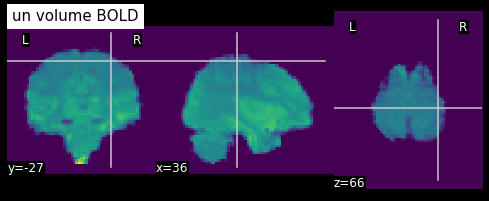

In [9]:
from nilearn.plotting import plot_img
from nilearn.image import index_img
plot_img(index_img(adhd.func[0], 0),
              bg_img=None,
              cut_coords=(36, -27, 66), 
              black_bg=True,
              title="un volume BOLD")

Le deuxième volume de la série :

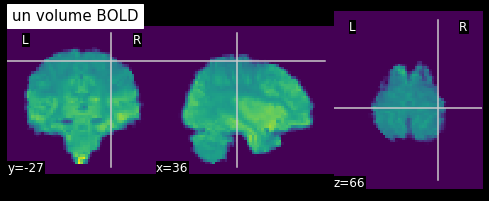

In [10]:
from nilearn.plotting import plot_img
from nilearn.image import index_img
plot_img(index_img(adhd.func[0], 1),
              bg_img=None,
              cut_coords=(36, -27, 66), 
              black_bg=True,
              title="un volume BOLD")

Les deux volumes sont très similaires! Les changements liés à l'oxygénation du sang sont très petits. On peut regarder le volume de manière interactive.

In [11]:
from nilearn.plotting import view_img 
viewer = view_img(index_img(adhd.func[0], 1), bg_img=None, title='un volume BOLD', symmetric_cmap=False, 
                  black_bg=True, threshold=0, cmap='hot')
viewer.save_as_html('bold.html')

**[Ouvrez la visualisation interactive](bold.html)** (assurez-vous d'ouvrir ce lien dans un ***nouvel onglet***)